In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/sample_submission.csv
/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv
/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/test.csv


In [2]:
# Importing the training and testing data

train = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv")
test = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/test.csv")

In [3]:
train

,content_id,title,content_type,genre,sub_genre,release_year,language,country_of_origin,content_age_rating,budget,...,completion_rate,total_views,avg_watch_time,revenue,awards,critic_score,user_engagement_score,marketing_spend,licensing_cost,user_retention
0,645543,The Surreal Conspiracy,Documentary,Drama,Historical,2013,Spanish,USA,PG,6.744258e+06,...,85.792005,8067.786265,20.718243,2835.071735,7,87.991891,110.000000,2.281850e+06,1481.325232,4.910349e+19
1,939316,Astro Saga in the Cosmos,Documentary,Drama,Crime,2023,Japanese,USA,PG,6.178134e+06,...,80.437724,750.473993,24.262058,655.016451,4,91.867209,85.750069,1.601333e+06,195.900521,NaN
2,280014,Synthesizing the Eternal Artifact,Movie,Action,Satire,2000,Japanese,USA,PG,1.588919e+07,...,82.882434,77701.229657,10.776592,19516.690216,3,66.761330,90.000000,5.274652e+06,15457.226653,4.901917e+23
3,215181,The Artifact of Savage Zenith,Movie,Romance,Satire,2019,English,UK,G,NaN,...,80.022574,4411.172846,11.376984,2701.183619,4,58.300367,113.564852,1.815005e+07,921.621615,1.672483e+15
4,241683,Resonating the Spectral Prophecy,Movie,Drama,Historical,1993,Spanish,USA,PG-13,1.518643e+07,...,72.209335,11678.765250,6.219910,16938.114373,1,47.234645,64.426039,4.809484e+06,15134.227463,2.539603e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,275603,Savage Mirage: A Post-Apocalyptic Tale (DN2X),TV Series,Thriller,Satire,1994,English,UK,PG-13,NaN,...,69.882336,92586.032921,0.000000,13560.116252,3,61.275219,99.949466,1.811536e+06,17711.529256,5.836582e+09
799996,589165,The Nanotech Saga: A Gothic Journey (D0C3),Movie,Thriller,Mystery,2022,Hindi,Germany,R,NaN,...,79.705466,855.074344,28.425068,523.751611,4,60.459610,63.091284,2.260154e+06,176.173228,4.094513e+07
799997,725081,Fusion Zenith: A Dystopian Tale,Movie,Sci-Fi,Adventure,2015,French,USA,PG-13,1.789605e+07,...,73.940943,399.926749,23.263186,637.234115,1,NaN,63.201272,3.491725e+06,236.855600,6.252512e+05
799998,708845,Hyper Paradox: A Post-Apocalyptic Tale (L6AD),Movie,Sci-Fi,Historical,2003,Japanese,UK,PG-13,2.353871e+07,...,82.954554,15174.684075,30.891095,9248.540015,2,78.395314,78.956053,4.494155e+06,8274.483184,9.061977e+21


## Task 1

### Data Exploration and Preparation

As a data analyst, you've received a new dataset for your upcoming project. Before diving into the main analysis, it's essential to ensure the data is ready for accurate and reliable results. Your task is to explore the dataset thoroughly, looking for any potential issues that could affect your findings.

Assess the completeness and consistency of the dataset. If you think the data is incomplete/inconsistent, why do you think so? Justify your answer. Identify any values or patterns that seem unusual or unexpected. Use an appropriate visualization method to highlight these anomalies visually.

Your goal is to prepare the dataset so you can confidently proceed with your analysis. Based on your visualizations, identify any concerns and develop strategies to address them.

Remember, the quality of your final results depends on the reliability of your input data. Take the time to thoroughly prepare and visualize your dataset, ensuring your conclusions will be as accurate and trustworthy as possible.

This data exploration and preparation stage is crucial before proceeding with any further analysis. The insights you gain and the cleaning processes you implement here will significantly impact the validity of your subsequent findings. Ensure your work in this stage is thorough and well-documented, as it forms the foundation for all your future analytical efforts. Once you're confident in the quality and integrity of your prepared dataset, you'll be well-positioned to move forward with further analysis.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   content_id             800000 non-null  int64  
 1   title                  800000 non-null  object 
 2   content_type           800000 non-null  object 
 3   genre                  800000 non-null  object 
 4   sub_genre              800000 non-null  object 
 5   release_year           800000 non-null  int64  
 6   language               800000 non-null  object 
 7   country_of_origin      800000 non-null  object 
 8   content_age_rating     800000 non-null  object 
 9   budget                 759925 non-null  float64
 10  runtime                800000 non-null  float64
 11  imdb_rating            760066 non-null  float64
 12  streamly_rating        800000 non-null  float64
 13  completion_rate        800000 non-null  float64
 14  total_views            800000 non-nu

Some of the rows have NULL values. This may due to human error, faulty instruments when trying to record the data, attritubes of interest were not considered important at the time of entry. Let's deal with NULL values now.

In [5]:
train = train.dropna(subset = ['user_retention'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760079 entries, 0 to 799999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   content_id             760079 non-null  int64  
 1   title                  760079 non-null  object 
 2   content_type           760079 non-null  object 
 3   genre                  760079 non-null  object 
 4   sub_genre              760079 non-null  object 
 5   release_year           760079 non-null  int64  
 6   language               760079 non-null  object 
 7   country_of_origin      760079 non-null  object 
 8   content_age_rating     760079 non-null  object 
 9   budget                 721997 non-null  float64
 10  runtime                760079 non-null  float64
 11  imdb_rating            722131 non-null  float64
 12  streamly_rating        760079 non-null  float64
 13  completion_rate        760079 non-null  float64
 14  total_views            760079 non-null  f

We are dropping NULL values in user_retention as it is our target variable

Let's handle the other NULL values now. We will plot the normal distribution for the columns with missing values. If it follows a normal distribution we will impute mean, genre-wise. If it follows a normal distribution that is skewed then we will impute median,genre-wise.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


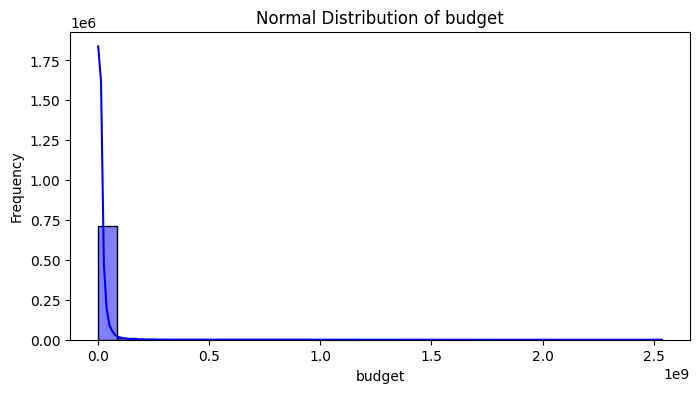

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


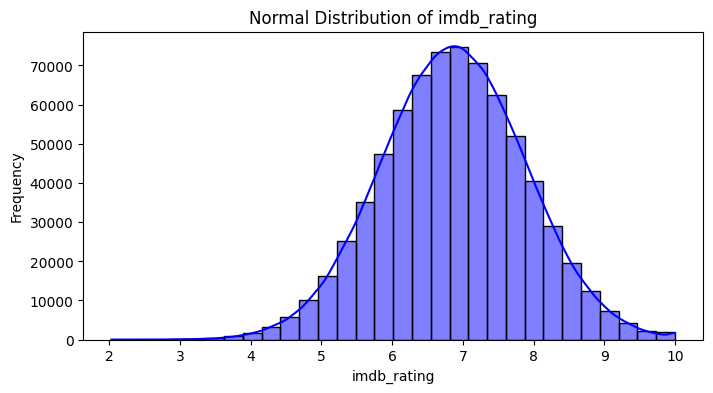

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


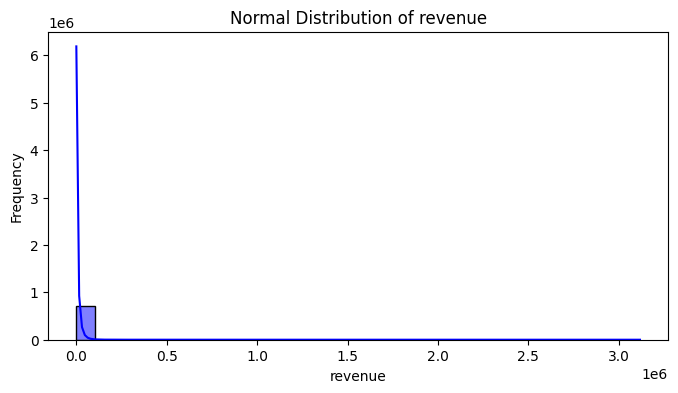

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


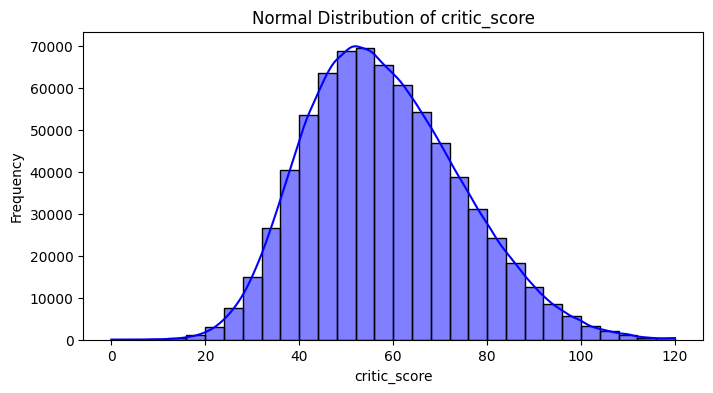

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


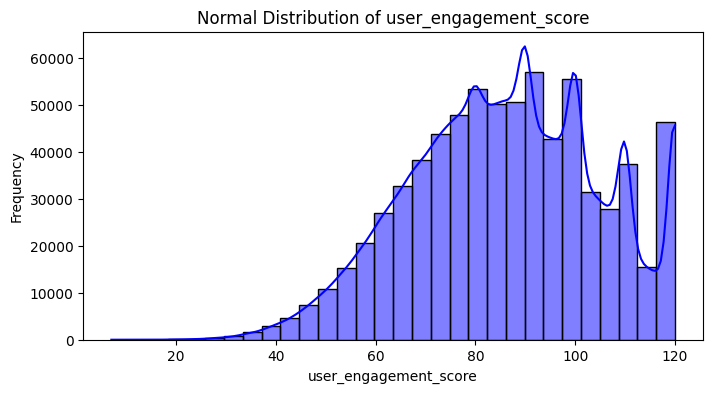

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


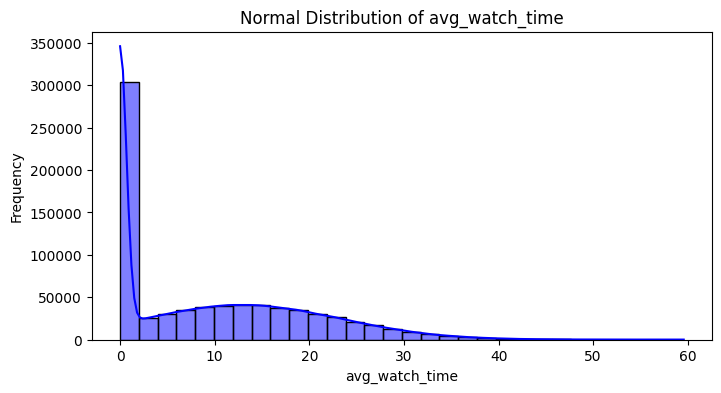

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_fill = ['budget', 'imdb_rating', 'revenue', 'critic_score', 'user_engagement_score', 'avg_watch_time']

for column in columns_to_fill:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[column], kde=True, bins=30, color='blue')
    plt.title(f'Normal Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [7]:

train['budget'] = train.groupby('genre')['budget'].transform(lambda x: x.fillna(x.median()))
train['imdb_rating'] = train.groupby('genre')['imdb_rating'].transform(lambda x: x.fillna(x.mean()))
train['revenue'] = train.groupby('genre')['revenue'].transform(lambda x: x.fillna(x.median()))
train['critic_score'] = train.groupby('genre')['critic_score'].transform(lambda x: x.fillna(x.median()))
train['user_engagement_score'] = train.groupby('genre')['user_engagement_score'].transform(lambda x: x.fillna(x.median()))
train.drop('avg_watch_time', axis=1, inplace=True)
print(train.head())

/tmp/ipykernel_374/1685653958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['budget'] = train.groupby('genre')['budget'].transform(lambda x: x.fillna(x.median()))
/tmp/ipykernel_374/1685653958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['imdb_rating'] = train.groupby('genre')['imdb_rating'].transform(lambda x: x.fillna(x.mean()))
/tmp/ipykernel_374/1685653958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

   content_id                                              title content_type  \
0      645543                             The Surreal Conspiracy  Documentary   
2      280014                  Synthesizing the Eternal Artifact        Movie   
3      215181                      The Artifact of Savage Zenith        Movie   
4      241683                   Resonating the Spectral Prophecy        Movie   
5      606526  Augmenting in the Quantum Foam: The Baroque Ad...        Movie   

     genre   sub_genre  release_year  language country_of_origin  \
0    Drama  Historical          2013   Spanish               USA   
2   Action      Satire          2000  Japanese               USA   
3  Romance      Satire          2019   English                UK   
4    Drama  Historical          1993   Spanish               USA   
5   Comedy     Mystery          2000   Spanish           Germany   

  content_age_rating        budget  ...  streamly_rating  completion_rate  \
0                 PG  6.744

/tmp/ipykernel_374/1685653958.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['user_engagement_score'] = train.groupby('genre')['user_engagement_score'].transform(lambda x: x.fillna(x.median()))
/tmp/ipykernel_374/1685653958.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('avg_watch_time', axis=1, inplace=True)


We will drop avg_watch_time column as it has too many 0 values.


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760079 entries, 0 to 799999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   content_id             760079 non-null  int64  
 1   title                  760079 non-null  object 
 2   content_type           760079 non-null  object 
 3   genre                  760079 non-null  object 
 4   sub_genre              760079 non-null  object 
 5   release_year           760079 non-null  int64  
 6   language               760079 non-null  object 
 7   country_of_origin      760079 non-null  object 
 8   content_age_rating     760079 non-null  object 
 9   budget                 760079 non-null  float64
 10  runtime                760079 non-null  float64
 11  imdb_rating            760079 non-null  float64
 12  streamly_rating        760079 non-null  float64
 13  completion_rate        760079 non-null  float64
 14  total_views            760079 non-null  f


# Task 2

## Comprehensive Movie Performance Analysis (1 mark)

Streamly's content team is seeking to gain a deeper understanding of the factors that contribute to a movie's success on their platform. Your task is to:

1. Conduct a thorough exploration of the relationships between all relevant variables in the dataset.

2. Investigate the concept of Return on Investment (ROI) across different movie genres. While ROI = movie_revenue / movie_budget is a starting point, develop at least one additional metric that provides some interesting insights into the success of movies. Explain the implications of both ROI and your new metric. What makes a movie successful?

3. Utilize appropriate visualization techniques to represent your findings.

As you analyze the data:

* What overall trends or anomalies do you notice when examining the relationships between different variables?
* Are there any unexpected correlations between factors that might not seem obviously related at first glance?
* Are there any surprising or counter-intuitive findings that challenge common assumptions about what makes a movie successful?

***Hint: Consider creating a correlogram to visualize the relationships between all numerical variables in the dataset. This can help you identify interesting patterns or connections that might not be immediately apparent.***

Your insights will help guide Streamly's content acquisition and promotion strategies, so be sure to clearly articulate any patterns or conclusions you derive from the data.

After completing your analysis, take a step back and reflect on the bigger picture. You have uncovered different relationships between various aspects of movies and their performance.

Remember, the goal is to provide actionable insights that can inform data-driven decision-making at Streamly.

In [9]:

train['ROI'] = train['revenue'] / train['budget']
train['Revenue_per_Engagement'] = train['revenue'] / train['user_engagement_score']
train

/tmp/ipykernel_374/1196901998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ROI'] = train['revenue'] / train['budget']
/tmp/ipykernel_374/1196901998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Revenue_per_Engagement'] = train['revenue'] / train['user_engagement_score']


,content_id,title,content_type,genre,sub_genre,release_year,language,country_of_origin,content_age_rating,budget,...,total_views,revenue,awards,critic_score,user_engagement_score,marketing_spend,licensing_cost,user_retention,ROI,Revenue_per_Engagement
0,645543,The Surreal Conspiracy,Documentary,Drama,Historical,2013,Spanish,USA,PG,6.744258e+06,...,8067.786265,2835.071735,7,87.991891,110.000000,2.281850e+06,1481.325232,4.910349e+19,0.000420,25.773379
2,280014,Synthesizing the Eternal Artifact,Movie,Action,Satire,2000,Japanese,USA,PG,1.588919e+07,...,77701.229657,19516.690216,3,66.761330,90.000000,5.274652e+06,15457.226653,4.901917e+23,0.001228,216.852114
3,215181,The Artifact of Savage Zenith,Movie,Romance,Satire,2019,English,UK,G,5.522225e+06,...,4411.172846,2701.183619,4,58.300367,113.564852,1.815005e+07,921.621615,1.672483e+15,0.000489,23.785384
4,241683,Resonating the Spectral Prophecy,Movie,Drama,Historical,1993,Spanish,USA,PG-13,1.518643e+07,...,11678.765250,16938.114373,1,47.234645,64.426039,4.809484e+06,15134.227463,2.539603e+08,0.001115,262.907895
5,606526,Augmenting in the Quantum Foam: The Baroque Ad...,Movie,Comedy,Mystery,2000,Spanish,Germany,PG-13,8.126704e+06,...,11110.634545,5894.212335,2,49.463357,74.638589,2.124096e+06,6327.310398,2.896923e+09,0.000725,78.970039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,275603,Savage Mirage: A Post-Apocalyptic Tale (DN2X),TV Series,Thriller,Satire,1994,English,UK,PG-13,7.881815e+06,...,92586.032921,13560.116252,3,61.275219,99.949466,1.811536e+06,17711.529256,5.836582e+09,0.001720,135.669722
799996,589165,The Nanotech Saga: A Gothic Journey (D0C3),Movie,Thriller,Mystery,2022,Hindi,Germany,R,7.881815e+06,...,855.074344,523.751611,4,60.459610,63.091284,2.260154e+06,176.173228,4.094513e+07,0.000066,8.301489
799997,725081,Fusion Zenith: A Dystopian Tale,Movie,Sci-Fi,Adventure,2015,French,USA,PG-13,1.789605e+07,...,399.926749,637.234115,1,61.276312,63.201272,3.491725e+06,236.855600,6.252512e+05,0.000036,10.082615
799998,708845,Hyper Paradox: A Post-Apocalyptic Tale (L6AD),Movie,Sci-Fi,Historical,2003,Japanese,UK,PG-13,2.353871e+07,...,15174.684075,9248.540015,2,78.395314,78.956053,4.494155e+06,8274.483184,9.061977e+21,0.000393,117.135287


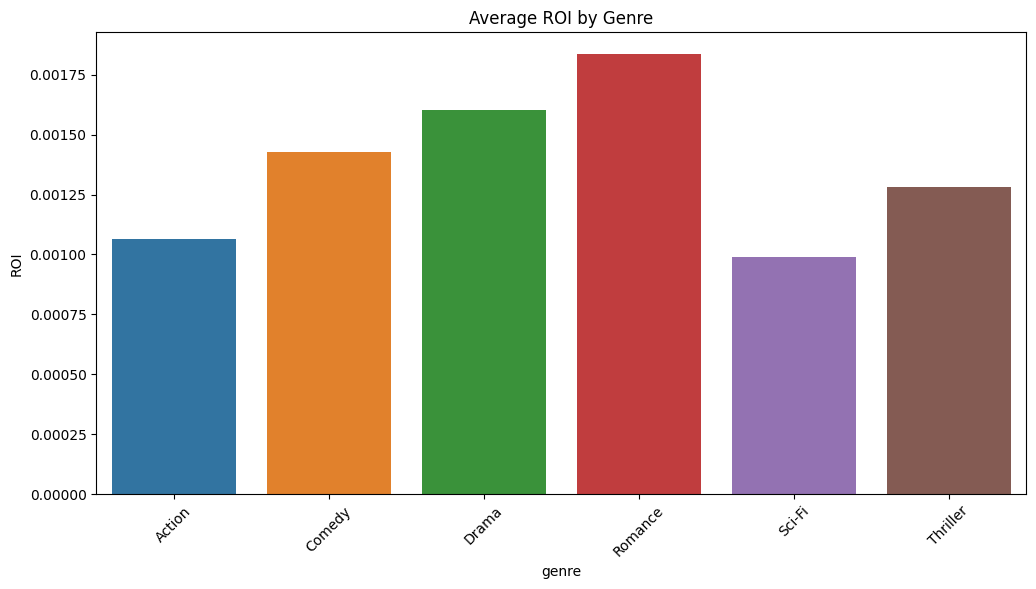

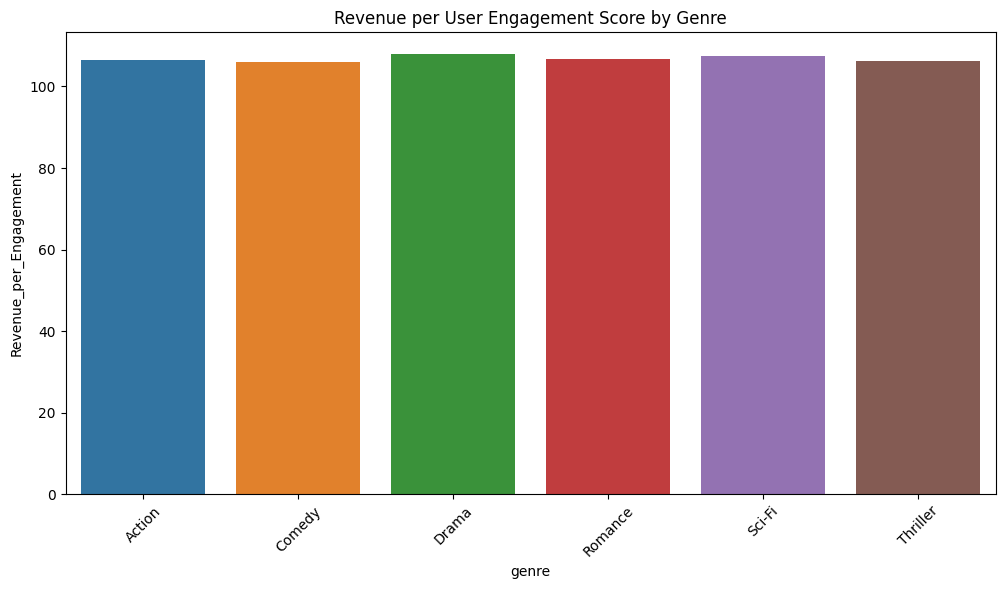

In [10]:

genre_metrics = train.groupby('genre').agg({
    'ROI': 'mean',
    'Revenue_per_Engagement': 'mean',
    'revenue': 'mean',
    'budget': 'mean'
}).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='genre', y='ROI', data=genre_metrics)
plt.xticks(rotation=45)
plt.title('Average ROI by Genre')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='genre', y='Revenue_per_Engagement', data=genre_metrics)
plt.xticks(rotation=45)
plt.title('Revenue per User Engagement Score by Genre')
plt.show()


This shows that ROI on romance is highest and ROI on Sci-fi is lowest. Revenue per engagement is similar for all genres. This means that for any given genre, if the engagement is good then revenue is good.

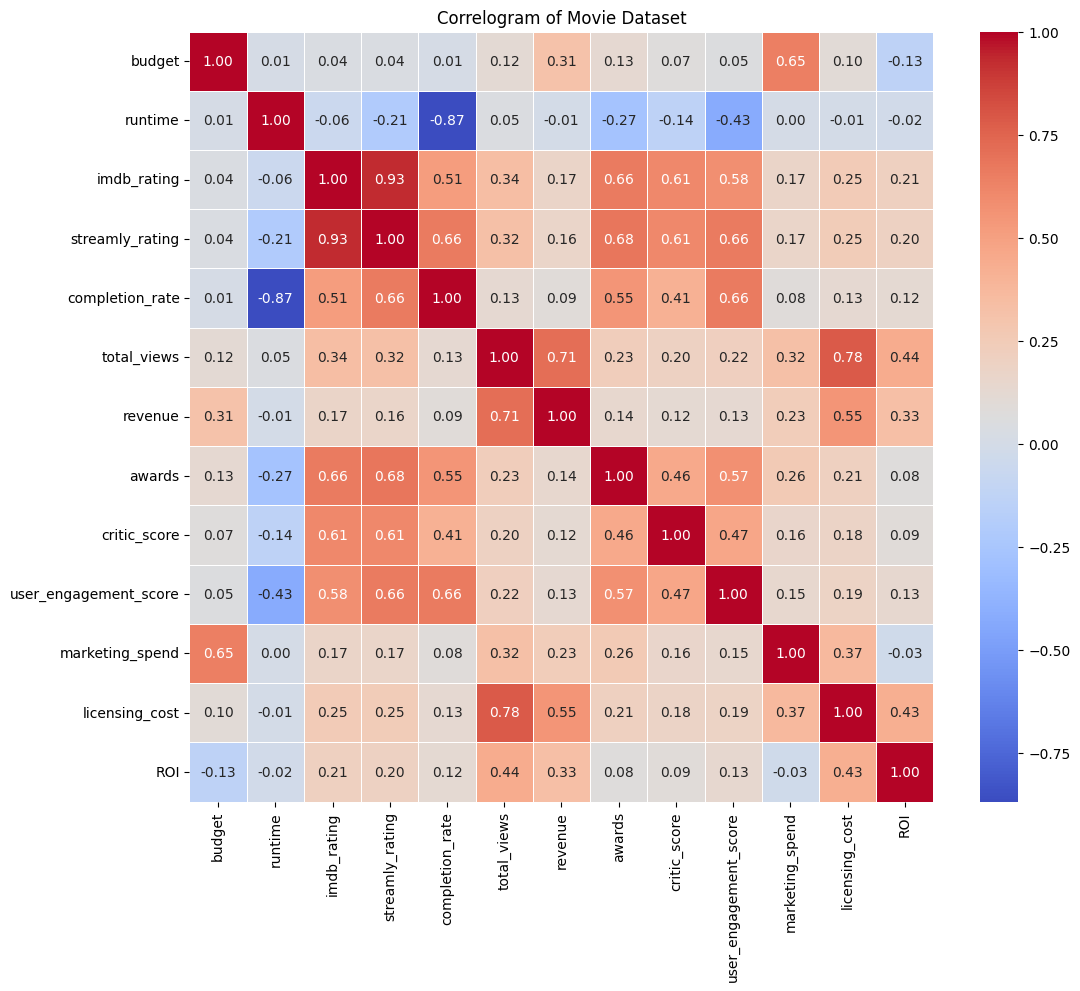

In [11]:

numerical_cols = [
    'budget', 'runtime', 'imdb_rating', 'streamly_rating', 
    'completion_rate', 'total_views', 'revenue', 'awards', 
    'critic_score', 'user_engagement_score', 'marketing_spend', 
    'licensing_cost', 'ROI']


df_numerical = train[numerical_cols]

corr = df_numerical.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlogram of Movie Dataset')
plt.show()


Here after we have plotted a correlogram of all numericals values, we see that runtime and completion rate have a high negative correlation. imdb rating and streamly rating have a high positive correlation. total views and licensing cost have a high positive correlation. revenue and total views also have a high correlation.

the correlation between completion_rate and user engagement score does not seem to be high enough even though both of them mean the similar thing.

# Task 3 

## Correlation analysis (0.5 marks)

Streamly's data science team is focused on optimizing content strategy, particularly around enhancing user retention.

Based on your correlation analysis, suggest strategies Streamly could adopt to improve user retention. Are there any patterns or relationships that seem peculiar?

Reflect on whether making certain adjustments to the variables could provide a clearer understanding of their impact on user retention. What would be your rationale for making these adjustments?

Plot another correlation matrix after you have made the adjustment(s). Based on the correlation plot you have just made, how can you increase user retention?

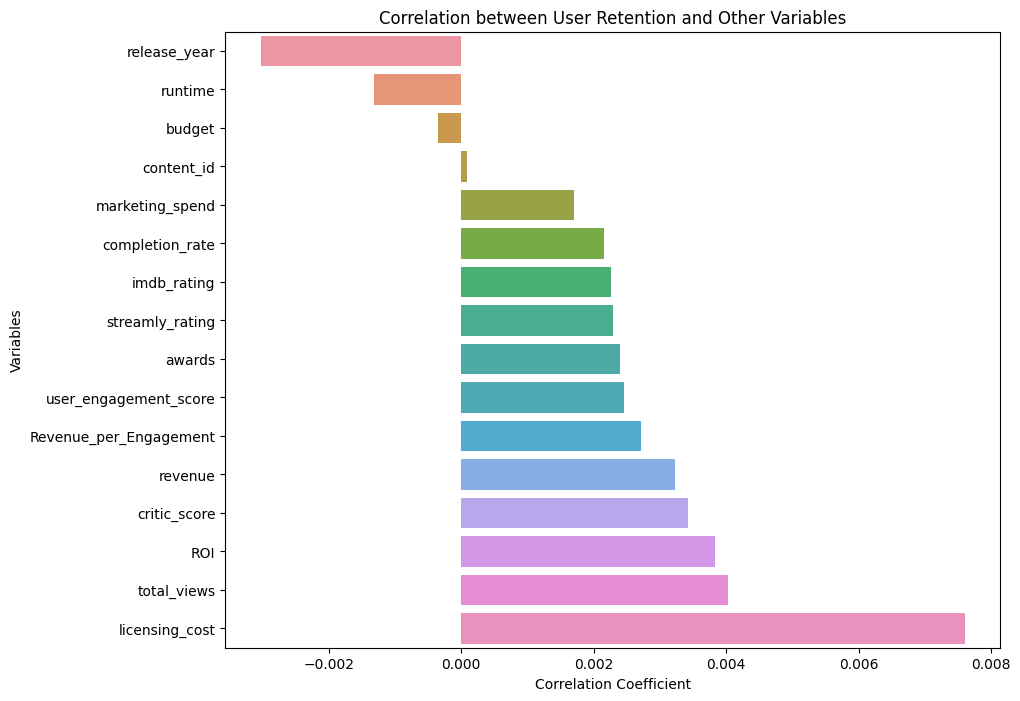

In [12]:
numeric_df = train.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

user_retention_corr = correlation_matrix['user_retention'].drop('user_retention').sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(x=user_retention_corr.values, y=user_retention_corr.index)
plt.title('Correlation between User Retention and Other Variables')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.show()

Initial correlation plot shows that correlation between user_retention and the other variables is low. this could mean that user_retention has a non-linear relationship with other variables. let's take log of the target variable to make it less non-linear.

/tmp/ipykernel_374/4029141844.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['user_retention_log'] = np.log1p(train['user_retention'])


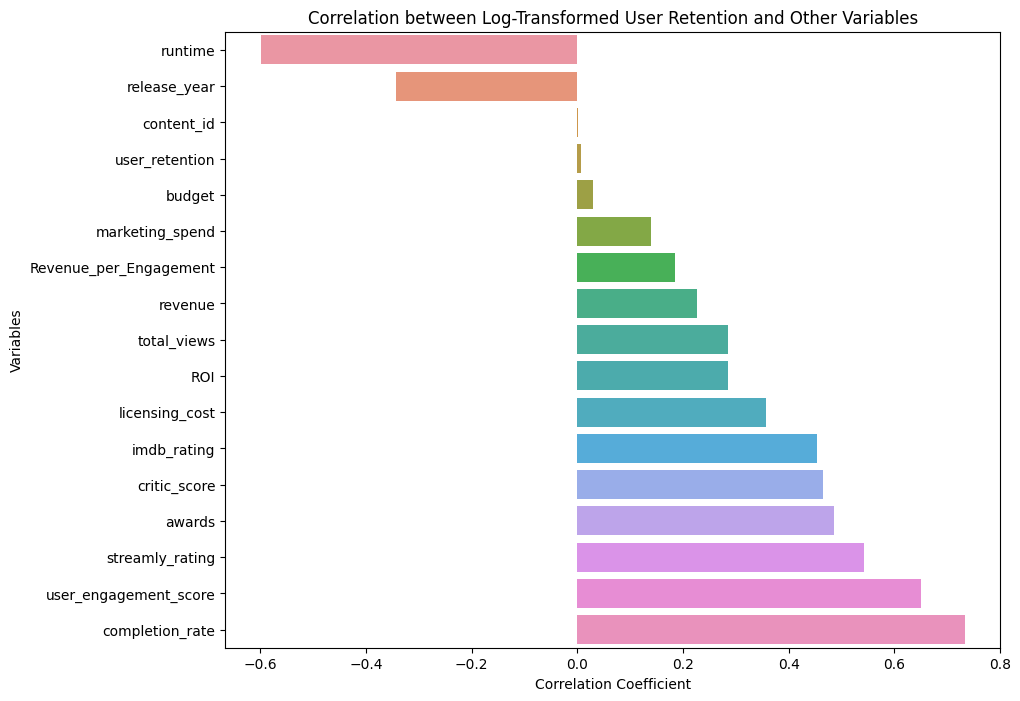

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train['user_retention_log'] = np.log1p(train['user_retention'])

numeric_df_transformed = train.select_dtypes(include=['float64', 'int64'])

correlation_matrix_transformed = numeric_df_transformed.corr()

user_retention_log_corr = correlation_matrix_transformed['user_retention_log'].drop('user_retention_log').sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(x=user_retention_log_corr.values, y=user_retention_log_corr.index)
plt.title('Correlation between Log-Transformed User Retention and Other Variables')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.show()


In [14]:
train

,content_id,title,content_type,genre,sub_genre,release_year,language,country_of_origin,content_age_rating,budget,...,revenue,awards,critic_score,user_engagement_score,marketing_spend,licensing_cost,user_retention,ROI,Revenue_per_Engagement,user_retention_log
0,645543,The Surreal Conspiracy,Documentary,Drama,Historical,2013,Spanish,USA,PG,6.744258e+06,...,2835.071735,7,87.991891,110.000000,2.281850e+06,1481.325232,4.910349e+19,0.000420,25.773379,45.340462
2,280014,Synthesizing the Eternal Artifact,Movie,Action,Satire,2000,Japanese,USA,PG,1.588919e+07,...,19516.690216,3,66.761330,90.000000,5.274652e+06,15457.226653,4.901917e+23,0.001228,216.852114,54.549083
3,215181,The Artifact of Savage Zenith,Movie,Romance,Satire,2019,English,UK,G,5.522225e+06,...,2701.183619,4,58.300367,113.564852,1.815005e+07,921.621615,1.672483e+15,0.000489,23.785384,35.053086
4,241683,Resonating the Spectral Prophecy,Movie,Drama,Historical,1993,Spanish,USA,PG-13,1.518643e+07,...,16938.114373,1,47.234645,64.426039,4.809484e+06,15134.227463,2.539603e+08,0.001115,262.907895,19.352688
5,606526,Augmenting in the Quantum Foam: The Baroque Ad...,Movie,Comedy,Mystery,2000,Spanish,Germany,PG-13,8.126704e+06,...,5894.212335,2,49.463357,74.638589,2.124096e+06,6327.310398,2.896923e+09,0.000725,78.970039,21.786915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,275603,Savage Mirage: A Post-Apocalyptic Tale (DN2X),TV Series,Thriller,Satire,1994,English,UK,PG-13,7.881815e+06,...,13560.116252,3,61.275219,99.949466,1.811536e+06,17711.529256,5.836582e+09,0.001720,135.669722,22.487411
799996,589165,The Nanotech Saga: A Gothic Journey (D0C3),Movie,Thriller,Mystery,2022,Hindi,Germany,R,7.881815e+06,...,523.751611,4,60.459610,63.091284,2.260154e+06,176.173228,4.094513e+07,0.000066,8.301489,17.527744
799997,725081,Fusion Zenith: A Dystopian Tale,Movie,Sci-Fi,Adventure,2015,French,USA,PG-13,1.789605e+07,...,637.234115,1,61.276312,63.201272,3.491725e+06,236.855600,6.252512e+05,0.000036,10.082615,13.345910
799998,708845,Hyper Paradox: A Post-Apocalyptic Tale (L6AD),Movie,Sci-Fi,Historical,2003,Japanese,UK,PG-13,2.353871e+07,...,9248.540015,2,78.395314,78.956053,4.494155e+06,8274.483184,9.061977e+21,0.000393,117.135287,50.558374


Now, we have a clearer view of correlation after applying logarithm to the target varible. we can improve retention rate by increasing completion_rate or decreasing runtime.

# Task 4

## User Retention Analysis and Modeling (1 mark)

Streamly's ultimate goal is to develop a model that predicts user retention for movies. You need to:

Develop a model to predict user retention based on content characteristics and performance metrics.
Analyze how each feature used in the model affects user retention and explain your reasoning.


You must have already studied measures like Mallows' Cp in class that are used for feature selection in multiple linear regression (MLR) models. Explore additional metrics similar to Mallows' Cp and discuss their usefulness in different scenarios. **(You don't have to write code for this)**

By analyzing how each feature affects user retention, you can gain valuable insights into the factors that drive or hinder viewer engagement with content on Streamly. Understanding the impact of these features allows you to refine your model for better accuracy, enabling Streamly to make data-driven decisions in content strategy.

all of the explanatory variables i have chosen either have 1. good correlation with log(user_retention) 2. have charactersitics that boost user_retention. i have also omitted taking more 2 variables that have very high multi-collinearity like streamly_rating and imdb_rating. i have considered only 1 for model building.

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define features and target
features = ['content_type', 'genre', 'sub_genre', 'language', 'country_of_origin', 
            'content_age_rating', 'release_year', 'budget', 'runtime', 
            'imdb_rating', 'completion_rate', 'total_views', 'revenue', 
            'awards', 'critic_score', 'user_engagement_score', 'marketing_spend', 'licensing_cost']
target = 'user_retention_log'

X = train[features]
y = train[target]

# Separate categorical and numerical columns
categorical_columns = ['content_type', 'genre', 'sub_genre', 'language', 'country_of_origin', 'content_age_rating']
numerical_columns = [col for col in features if col not in categorical_columns]

# Define preprocessor for numerical and categorical data
numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_columns),
        ('cat', categorical_preprocessor, categorical_columns)
    ])

# Create pipeline with preprocessor and Linear Regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared value for the MLR model: {r_squared}")

# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of observations
k = X_test.shape[1]  # Number of predictors (features)

adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - k - 1))

print(f"Adjusted R-squared value: {adjusted_r_squared}")


R-squared value for the MLR model: 0.8554884878271714
Adjusted R-squared value: 0.8554713742840152


In [16]:
y_test

508599    54.152751
46902     10.932933
355672    46.779747
215819    37.619879
7644      24.086240
            ...    
756313    22.719302
175138    17.235788
697142    35.486042
585563    44.275870
77533     20.904796
Name: user_retention_log, Length: 152016, dtype: float64

In [17]:
y_pred

array([47.54203962,  9.95126899, 33.46867422, ..., 32.75832429,
       32.65583967, 29.17396389])

Akaike Information Criterion (AIC)
Description: AIC assesses the goodness-of-fit of a model while penalizing for the number of parameters to avoid overfitting. AIC is useful for model comparison. Lower AIC values indicate a better model considering both fit and complexity.

# Task 5 
## Model Evaluation (0.5 marks)

To ensure the reliability of the regression model, you need to:
Select appropriate evaluation metrics to assess the model's performance.
Calculate and interpret the chosen evaluation metrics.

Do you think this evaluation metric is appropriate for this problem? Does this give us a complete picture of the solution? If not, is there any other metric that can provide us a more complete picture?

The model evaluation will give Streamly confidence in the model's predictions and guide them in refining the model for better performance.

evaluation metric that i feel is best is adjusted r square. in a MLR model as number of parameters increase, rsqaure will increase whether or not the parameters are statistically significant or not. this is bad as it narrates a false story to a data analyst. therefore using adjusted r square is better which takes into account DOF also. the calculation of adjusted r sqaure i have done in the previous task :)

In [18]:
import numpy as np
import pandas as pd

numerical_features = [
    'budget', 'runtime', 'imdb_rating', 'streamly_rating', 
    'completion_rate', 'total_views', 'revenue', 'critic_score', 
    'user_engagement_score', 'marketing_spend', 'licensing_cost'
]

X_test_data = test[features]

y_pred = pipeline.predict(X_test_data)

test_predictions = test.copy()
test_predictions['user_retention'] = y_pred

result = test_predictions[['title', 'user_retention']]

print(result.head())
X_test_data


                                               title  user_retention
0                  Pulsating the Eternal Tale (AG4P)       41.938177
1                   Arcane Legend: A Spy Tale (NFVT)       39.656538
2                           The Neon Grimoire (9RHA)       35.688091
3  Pulsating through the Dreamscape: The Mega Mirage       16.686662
4                            The Turbo Enigma (D23S)       34.907237


,content_type,genre,sub_genre,language,country_of_origin,content_age_rating,release_year,budget,runtime,imdb_rating,completion_rate,total_views,revenue,awards,critic_score,user_engagement_score,marketing_spend,licensing_cost
0,Documentary,Comedy,Crime,Korean,USA,PG,1999,4.683195e+06,136.000000,7.119992,80.822427,42161.730510,14859.234244,4,53.737682,83.156788,2.256387e+06,10744.952770
1,Movie,Sci-Fi,Historical,English,USA,PG,2014,3.814252e+06,117.000000,7.965514,82.671797,4496.565270,1261.123903,5,79.328075,120.000000,7.938047e+05,689.002186
2,Movie,Drama,Mystery,English,USA,PG-13,2014,9.512836e+06,131.000000,8.798813,86.420889,17844.468549,3464.497869,5,93.954789,117.015037,3.428071e+06,1649.461329
3,Movie,Comedy,Mystery,French,South Korea,PG-13,2021,7.115981e+06,115.000000,5.672107,74.708459,354.307774,308.468153,4,41.203464,80.498857,1.801149e+06,74.148614
4,Movie,Comedy,Crime,English,Germany,G,2009,3.531398e+06,96.000000,5.505874,74.798825,2165.593265,1136.282205,1,51.106721,92.280388,7.737343e+05,520.776943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146962,Movie,Drama,Crime,English,France,PG-13,2017,1.135993e+07,150.000000,5.754719,76.005622,470.357108,609.840830,0,62.200036,97.022150,3.408989e+06,249.652277
146963,TV Series,Sci-Fi,Crime,French,USA,R,1995,5.189979e+06,751.781841,5.069665,65.692665,6633.184965,4316.539206,2,36.772290,53.052543,9.136600e+05,5027.444002
146964,Movie,Thriller,Crime,German,UK,PG-13,2007,4.227593e+06,139.000000,6.354834,78.884140,2762.239103,1875.731817,2,55.657385,77.158578,1.052925e+06,1145.072620
146965,TV Series,Comedy,Crime,Spanish,Germany,PG,2022,2.607187e+07,1278.417073,7.792098,67.947951,5038.397576,1291.778175,1,58.151314,76.117639,6.886195e+06,373.978595


In [19]:
submission = pd.DataFrame()
submission["title"] = test["title"]

In [20]:
submission["user_retention"] = test_predictions["user_retention"]

In [21]:
submission

,title,user_retention
0,Pulsating the Eternal Tale (AG4P),41.938177
1,Arcane Legend: A Spy Tale (NFVT),39.656538
2,The Neon Grimoire (9RHA),35.688091
3,Pulsating through the Dreamscape: The Mega Mirage,16.686662
4,The Turbo Enigma (D23S),34.907237
...,...,...
146962,Transmuting the Plasma Mystery (J9LT),17.667064
146963,Conquering atop the Misty Mountains: The Spect...,4.916933
146964,The Gritty Odyssey: A Time Travel Journey (FLIP),24.917844
146965,Neon Paradox across the Astral Sea (OIDB),8.270778


In [23]:
submission.to_csv('submissionfinal2.csv', index = False)

## Congratulations! 🎉

You've successfully completed the Data Analytics (UE22CS342AA2) Hackathon-1 assignment. This is a significant achievement that demonstrates your growing skills in data modeling and analysis.

### What you've accomplished:
- Applied data analytics concepts to a real-world scenario
- Developed regression models

### What's next:
You're now equipped with the foundational skills needed for real-world data modeling and regression analysis. The techniques you've learned here are directly applicable to many data science and machine learning projects in various industries.

Remember, this is just the beginning of your data science journey. Keep exploring, keep learning, and don't hesitate to take on more challenging projects!

**Congratulations once again, and best of luck for your next assignment!** 